<a href="https://colab.research.google.com/github/casjunior93/Tera---Desafio-de-classificacao/blob/main/TERA_Desafio_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio de Detecção e Redução de Fraudes no Setor Financeiro**

O desafio é propor uma solução para detecção e análise de fraudes que possam reduzir os riscos da empresa de crédito em que trabalho e garantir margens saudáveis.

Link do dataset: https://drive.google.com/file/d/1zjK8zQK5zvhR_r2chWI5dCjeOwASlPfb/view

Vou começar importando as bibliotecas iniciais:

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Agora importo os dados:

In [2]:
df = pd.read_csv('./fraud_detection_dataset.csv')

Visualizo as dimensões do dataframe:

In [3]:
df.shape

(6362620, 11)

Vou retornar 10 linhas aleatórias para visualizar o dataframe:

In [4]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1397337,139,PAYMENT,10143.99,C821566997,190133.84,179989.85,M1124019745,0.00,0.00,0,0
701738,37,CASH_OUT,43965.00,C387321567,78782.00,34817.00,C1488105543,0.00,43965.00,0,0
3436150,256,PAYMENT,9962.10,C1298074283,106236.00,96273.90,M1529370667,0.00,0.00,0,0
1285518,135,CASH_OUT,301737.55,C1917791518,481559.85,179822.29,C459184199,3779829.23,4081566.78,0,0
2715775,211,CASH_OUT,39252.81,C1533053630,0.00,0.00,C644072852,56882.69,96135.50,0,0
5068193,354,CASH_OUT,82158.59,C1285057072,160093.00,77934.41,C1910018633,1314342.90,1396501.49,0,0
1108634,130,CASH_OUT,435917.25,C2125204177,0.00,0.00,C2103029245,857708.09,956776.37,0,0
3875211,283,CASH_OUT,69728.73,C676211728,25749.00,0.00,C258972837,383193.82,452922.55,0,0
4320450,308,PAYMENT,181.65,C848626799,0.00,0.00,M1557449888,0.00,0.00,0,0
4011461,299,PAYMENT,18480.87,C2098618509,0.00,0.00,M453592445,0.00,0.00,0,0


## Conhecendo as features deste dataset:

* `step` - Passo: representa o total de horas transcorrido desde o início da simulação. Esta feature vai variar entre 1 e 744 (30 dias);

* `type` - Tipo: tipo de transação (depósito, saque, débito, pagamento e transferência);

* `amount` - Quantia: total que foi transacionado;

* `nameOrig` - ClienteOrigem: cliente que iniciou a transação

* `oldbalanceOrg` - SaldoInicialOrigem: saldo da conta de origem antes da transação;

* `newbalanceOrig` - SaldoFinalOrigem: saldo da conta de origem após a transação;

* `nameDest` - ClienteDestino: cliente de destino da transação;

* `oldbalanceDest` - SaldoInicialDestino: saldo da conta de destino antes da transação;

* `newbalanceDest` - SaldoFinalDestino: saldo da conta de destino após a transação;

* `isFraud` - ÉFraude: flag que define se a transação é fraudulenta ou não. Nesta simulação o objetivo da fraude é assumir a conta do usuário, esvaziá-la transferindo para outra conta e então sacando o dinheiro.

* `isFlaggedFraud` - SinalizadaComoFraude: automaticamente marcadas pelo banco como fraude por tentarem transferir mais de 200.000 em uma única transação.

# Pré-análise dos dados com SeetViz

Primeiro vou renomear as tabelas para facilitar a análise.

In [5]:
df = df.rename(
    columns={"step":"totalHoras", "type": "tipoTransacao", "amount": "quantia",
             "nameOrig": "clienteOrigem", "oldbalanceOrg": "saldoInicialOrigem",
             "newbalanceOrig": "saldoFinalOrigem", "nameDest": "clienteDestino",
             "oldbalanceDest": "saldoInicialDestino", "newbalanceDest": "saldoFinalDestino",
             "isFraud": "ehFraude", "isFlaggedFraud": "sinalizadaComoFraude"

             })
df.head(3)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0


Agora importo o SweetViz

In [6]:
#!pip install sweetviz
#import sweetviz

O SeetViz gera um relatório em HTML com várias informações sobre as features do dataset.

In [7]:
#analise=sweetviz.analyze(df)
#analise.show_html()

Ao analisar o relatório do SweetViz, vi que o dataset tem 3 features categóricas (tipoTransacao, ehFraude e sinalizadaComoFraude), 6 numéricas (totalHoras, quantia, saldoInicialOrigem, saldoFinalOrigem, saldoInicialDestino e saldoFinalDestino) e 2 textuais (clienteOrigem, clienteDestino). Nenhuma feature tem valores faltantes.

# Tratamento de Dados

Vou tratar a feature categórica tipoTransacao com o método get_dummies do Pandas.

In [8]:
df.tipoTransacao.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
df2 = pd.get_dummies(df.tipoTransacao)

A coluna tipoTransacao tem 5 valores únicos. Com o método get_dummies será criado uma coluna em um novo dataframe para cada valor único. Para cada transação, o tipo dessa transação vai receber o valor 1.

In [10]:
df2.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


Agora concateno o df2 com o dataframe original df.

In [11]:
df3 = pd.concat([df, df2], axis='columns')
df3.sample(10)

,totalHoras,tipoTransacao,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
5957207,405,PAYMENT,46166.51,C795805676,0.00,0.00,M556184646,0.00,0.00,0,0,0,0,0,1,0
5320634,374,CASH_OUT,250695.59,C660968590,12529.00,0.00,C2125844132,919354.88,1170050.48,0,0,0,1,0,0,0
4109754,302,CASH_IN,330633.11,C1354813689,2103314.95,2433948.05,C679506522,1916102.50,1585469.39,0,0,1,0,0,0,0
6093761,522,CASH_OUT,11250.20,C485988686,1564.00,0.00,C1385655501,0.00,11250.20,0,0,0,1,0,0,0
3608662,265,TRANSFER,506100.96,C1078396594,24799.48,0.00,C244625639,2349726.37,2855827.32,0,0,0,0,0,0,1
2337248,189,CASH_OUT,186112.07,C1303184482,0.00,0.00,C1378734258,806057.54,992169.61,0,0,0,1,0,0,0
1282775,135,CASH_OUT,486833.93,C1586060502,5556.00,0.00,C250266041,4524.31,491358.25,0,0,0,1,0,0,0
2925001,229,CASH_OUT,140108.26,C57261458,0.00,0.00,C1809709987,736753.22,876861.47,0,0,0,1,0,0,0
4345252,308,CASH_IN,1494.38,C186964807,12717.00,14211.38,C464905636,406531.80,405037.42,0,0,1,0,0,0,0
225302,14,CASH_OUT,255490.61,C927774494,12214.00,0.00,C2087524386,0.00,255490.61,0,0,0,1,0,0,0


Agora vou dropar a coluna tipoTransacao.

In [12]:
df3.drop('tipoTransacao', axis='columns', inplace=True)
df3.sample(3)

,totalHoras,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
1784668,162,17689.07,C297583221,275936.18,258247.11,M1811267228,0.00,0.00,0,0,0,0,0,1,0
4605415,329,229300.19,C988517906,136.00,0.00,C1498893177,0.00,229300.19,0,0,0,1,0,0,0
4446239,323,207763.20,C414206865,2251619.33,2459382.53,C14132216,553844.61,346081.41,0,0,1,0,0,0,0


E renomear as novas colunas

In [13]:
df3 = df3.rename(
    columns={"CASH_IN":"deposito", "CASH_OUT": "saque", "DEBIT": "debito",
             "PAYMENT": "pagamento", "TRANSFER": "transferencia",
             })
df3.head(3)

,totalHoras,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,deposito,saque,debito,pagamento,transferencia
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1


Criando uma nova coluna. Percebi que na metade das transações marcadas como fraude, o valor de saldoFinalOrigem acaba ficando menor que o valor de saldoFinalDestino.

In [14]:
print(f'(Soma das fraudes: {df3.ehFraude.loc[df3.ehFraude == 1].count()})')
print(f'Soma das fraudes onde o saldoFinalDestino é maior que saldoFinalOrigem: {df3.ehFraude.loc[(df3.saldoFinalDestino > df3.saldoFinalOrigem) & df3.ehFraude == 1].count()}')

(Soma das fraudes: 8213)
Soma das fraudes onde o saldoFinalDestino é maior que saldoFinalOrigem: 4122


In [15]:
df3['saldoFinalDestinoMenosSaldoFinalOrigem'] = df3['saldoFinalDestino'] - df3['saldoFinalOrigem']

Criando outra nova coluna com o número de transações que o clienteOrigem iniciou no período e outra com o número de transações que um clienteDestino pode ter participado.

In [16]:
clienteOrigemNP = df3.clienteOrigem.to_numpy()
clienteDestinoNP = df3.clienteDestino.to_numpy()

In [17]:
from collections import Counter

In [18]:
contadorCO = Counter(clienteOrigemNP)
contadorCD = Counter(clienteDestinoNP)

In [34]:
df_contadorCO = pd.DataFrame.from_dict(contadorCO, orient='index').reset_index()
df_contadorCO = df_contadorCO.rename(columns={ 0:'contador'})
df_contadorCO.set_index('index',inplace=True)
df_contadorCO.head(10)

,contador
index,
C1231006815,1
C1666544295,1
C1305486145,1
C840083671,1
C2048537720,1
C90045638,1
C154988899,1
C1912850431,1
C1265012928,1


In [33]:
df_contadorCD = pd.DataFrame.from_dict(contadorCD, orient='index').reset_index()
df_contadorCD = df_contadorCD.rename(columns={0:'contador'})
df_contadorCD.set_index('index',inplace=True)
df_contadorCD.head(10)

,contador
index,
M1979787155,1
M2044282225,1
C553264065,44
C38997010,41
M1230701703,1
M573487274,1
M408069119,1
M633326333,1
M1176932104,1


In [21]:
print(contadorCO['C1305486145'])
print(contadorCD['C553264065'])

1
44


In [22]:
def retorna_transacoes_por_periodo_cliente_origem(df):
    return contadorCO[df.clienteOrigem]

In [26]:
%%time
df3['transacoesClienteOrigemPeriodo'] = df3.apply(retorna_transacoes_por_periodo_cliente_origem, axis=1)

Wall time: 2min 53s


Criando outra coluna para o número de transações que o clienteDestino participou.

In [27]:
def retorna_transacoes_por_periodo_cliente_destino(df):
    return contadorCD[df.clienteDestino]

In [28]:
%%time
df3['transacoesClienteDestinoPeriodo'] = df3.apply(retorna_transacoes_por_periodo_cliente_destino, axis=1)

Wall time: 2min 49s


Exportando o dataset com as novas features em csv para não ter que ficar horas esperando para montá-lo novamente:

In [29]:
%%time
df3.to_csv('df3_novas_features.csv', index=False)

Wall time: 1min 38s


Testando as novas features:

In [49]:
total = df3.clienteDestino.loc[df3['clienteDestino'] == 'C553264065'].count()
total_contadorCD = contadorCD['C553264065']
print(f'Quantas transações o cliente C553264065 recebeu: {total}')
print(f'No dicionário do contador: {total_contadorCD}')
print(f'Em linhas do novo dataframe:')
df3.loc[df3['clienteDestino'] == 'C553264065'].head(5)

Quantas transações o cliente C553264065 recebeu: 44
No dicionário do contador: 44
Em linhas do novo dataframe:


,totalHoras,quantia,clienteOrigem,saldoInicialOrigem,saldoFinalOrigem,clienteDestino,saldoInicialDestino,saldoFinalDestino,ehFraude,sinalizadaComoFraude,deposito,saque,debito,pagamento,transferencia,saldoFinalDestinoMenosSaldoFinalOrigem,transacoesClienteOrigemPeriodo,transacoesClienteDestinoPeriodo
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1,0.00,1,44
6167,6,109985.65,C570434649,41851.00,0.00,C553264065,0.00,109985.65,0,0,0,0,0,0,1,109985.65,1,44
7903,7,10256.20,C111105514,3766080.24,3776336.45,C553264065,109985.65,99729.44,0,0,1,0,0,0,0,-3676607.01,2,44
16381,8,111622.39,C1457214570,2347.00,0.00,C553264065,99729.44,5254.44,0,0,0,1,0,0,0,5254.44,1,44
20003,8,206097.39,C161724858,1991.12,208088.52,C553264065,211351.84,5254.44,0,0,1,0,0,0,0,-202834.08,1,44


# Análise exploratória dos dados

Visualização das Features x ehFraude

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(df3, x_vars=['ehFraude'], y_vars=['saldoInicialOrigemPorQuantia'], hue='ehFraude');

<div>
    <div  style="display: flex;">
        <img src="./graficos/totalHoras-ehFraude.png" style="height: 250px;">
        <img src="./graficos/quantia-ehFraude.png" style="height: 250px;">
        <img src="./graficos/saldoInicialOrigem-ehFraude.png" style="height: 250px;">
    </div>
    <div style="display: flex;">
        <img src="./graficos/saldoFinalOrigem-ehFraude.png" style="height: 250px;">
        <img src="./graficos/saldoInicialDestino-ehFraude.png" style="height: 250px;">
        <img src="./graficos/saldoFinalDestino-ehFraude.png" style="height: 250px;">
    </div>
    <div style="display: flex;">
        <img src="./graficos/saldoFinalDestinoMenosSaldoFinalOrigem-ehFraude.png" style="height: 250px;">
    </div>
</div>

Visualização da discrepância entre as classes da feature ehFraude. Será necessário um balanceamento.

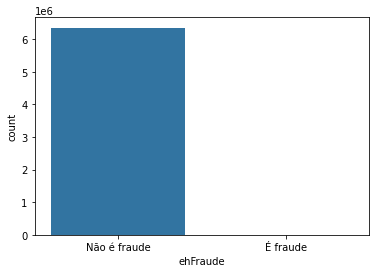

In [31]:
g = sns.countplot(df3.ehFraude)
g.set_xticklabels(['Não é fraude', 'É fraude'])
plt.show();

Identificando correlações entre variáveis através de um mapa de calor.

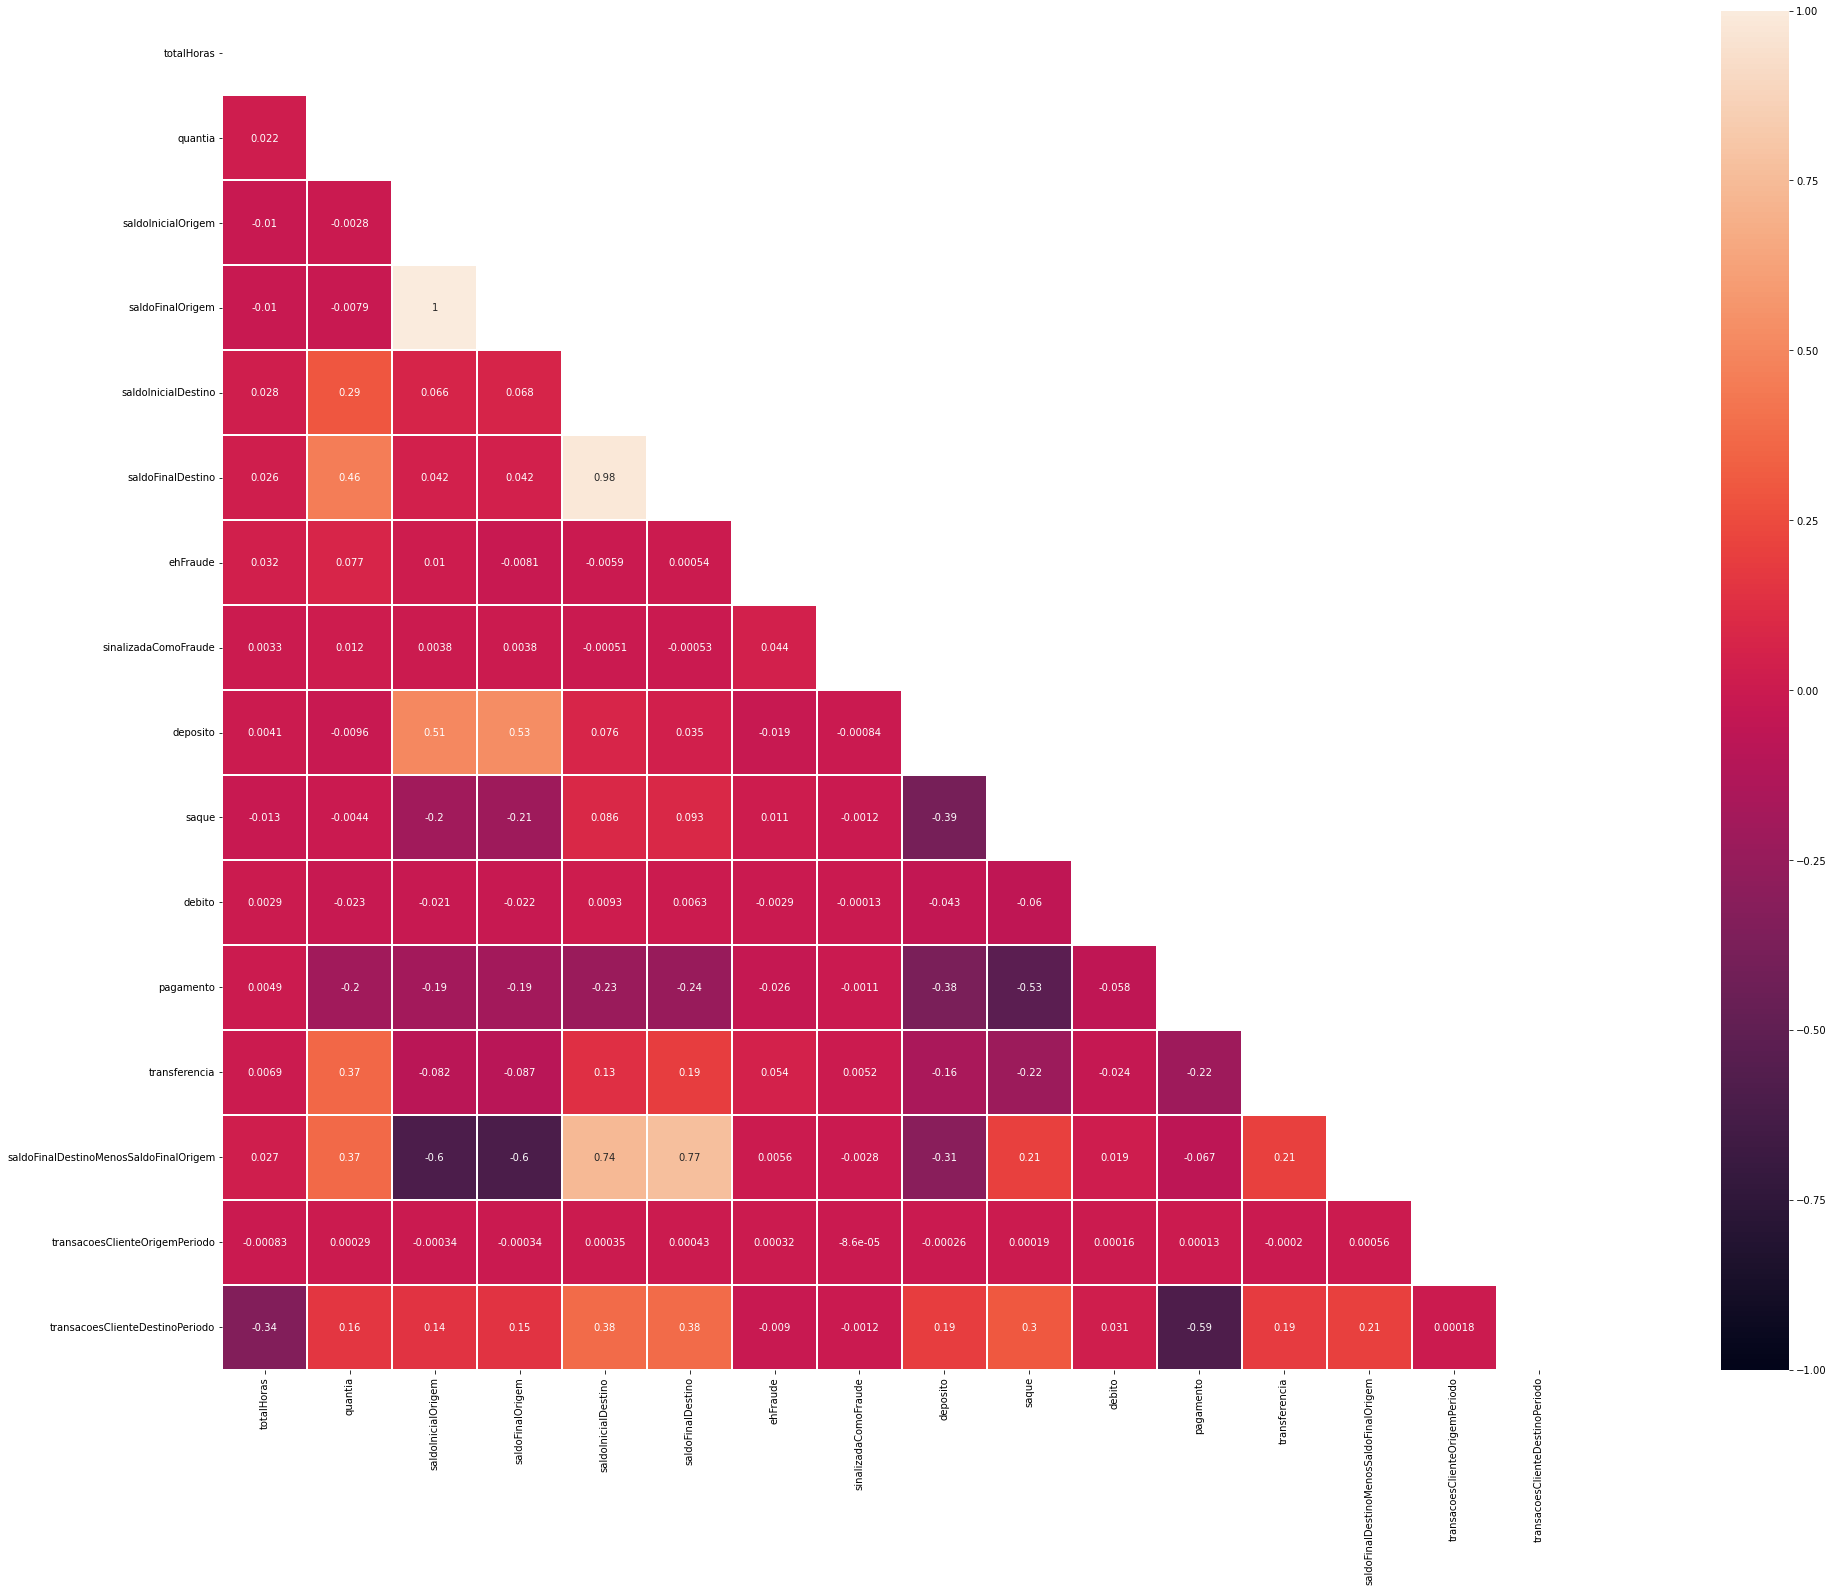

In [32]:
import numpy as np

mask = np.triu(np.ones_like(df3.corr(), dtype=np.bool))
plt.figure(figsize=(50,25))
sns.heatmap(df3.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1, linewidths=1.5)
plt.show();

As features saldoFinalOrigem e saldoInicialOrigem tem um forte correlação (~1) enquanto saldoFinalDestino e saldoInicialDestino também tem uma forte correlação (0.98). A feature saldoFinalDestinoMenosSaldoFinalOrigem que criei também tem uma alta correlação com as features 